In [6]:
from __future__ import division, print_function

# Third-party
import astropy.units as u
from astropy.constants import G
import matplotlib.pyplot as plt
import numpy as np
import yt
%matplotlib inline

# Custom
import gary.dynamics as gd
import gary.integrate as gi
import gary.io as io
import gary.potential as gp
from gary.units import galactic
G = G.decompose(galactic).value

In [7]:
potential = gp.load("/Users/adrian/projects/morphology/potentials/triaxial-NFW.yml")
r_s = potential.parameters['r_s']
potential

<LeeSutoTriaxialNFWPotential: a=1.00, c=0.55, b=0.77, r_s=20.00, R=[ 1.  0.  0.  0.  1.  0.  0.  0.  1.], v_c=0.18>

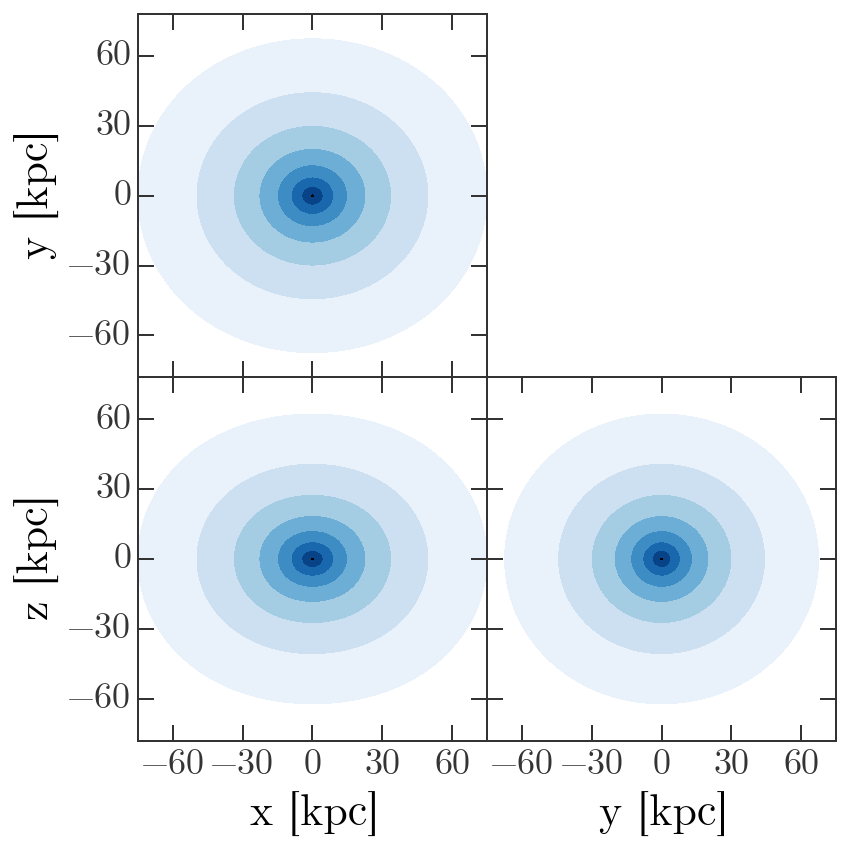

In [3]:
lim = 75
grid = np.linspace(-120,120,1000)
cmap = 'Blues_r'
vals = potential.value(np.array([[1.,0,0],[lim,0,0]]))

levels = np.linspace(vals.min(), vals.max(), 8)
# levels = np.logspace(vals.min(), vals.max(), 10)

# ------------------------------------------------

fig,axes = plt.subplots(2,2, figsize=(6,6), sharex=True, sharey=True)
fig.set_facecolor('w')
fig = potential.plot_contours(grid=(grid,grid,0), ax=axes[0,0], cmap=cmap, levels=levels)
fig = potential.plot_contours(grid=(grid,0,grid), ax=axes[1,0], cmap=cmap, levels=levels)
fig = potential.plot_contours(grid=(0,grid,grid), ax=axes[1,1], cmap=cmap, levels=levels)

axes[0,0].set_xlim(-75,75)
axes[0,0].set_ylim(*axes[0,0].get_xlim())

axes[0,0].set_ylabel(r"y [kpc]")
axes[1,0].set_xlabel(r"x [kpc]")
axes[1,0].set_ylabel(r"z [kpc]")
axes[1,1].set_xlabel(r"y [kpc]")

# Hack to hide hole
axes[0,0].plot(0,0,marker='o',zorder=-1000,c='k')
axes[1,0].plot(0,0,marker='o',zorder=-1000,c='k')
axes[1,1].plot(0,0,marker='o',zorder=-1000,c='k')

tk = [-60,-30,0,30,60]
for ax in axes.flat:
    ax.set_aspect('equal')
    ax.xaxis.set_ticks(tk)
    ax.yaxis.set_ticks(tk)

fig.tight_layout()
fig.subplots_adjust(wspace=0., hspace=0.)
axes[0,1].set_visible(False)

fig.savefig("/Users/adrian/papers/papers/stream-morphology/figures/potential.pdf")

---

In [8]:
maxx = 75.
grid1d = np.linspace(-maxx,maxx,128)
xx,yy,zz = np.meshgrid(grid1d,grid1d,grid1d)

In [9]:
xyz = np.vstack((xx.flat,yy.flat,zz.flat)).T
pot_val = np.abs(potential.value(xyz).reshape(xx.shape))

In [10]:
data = dict(potential=(pot_val, "kpc**2/Myr**2"))
bbox = np.array([[-maxx, maxx], [-maxx, maxx], [-maxx, maxx]])
ds = yt.load_uniform_grid(data, pot_val.shape, bbox=bbox, length_unit="kpc")

yt : [INFO     ] 2015-05-21 13:59:24,208 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-05-21 13:59:24,209 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2015-05-21 13:59:24,212 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2015-05-21 13:59:24,219 Parameters: domain_right_edge         = [ 75.  75.  75.]
yt : [INFO     ] 2015-05-21 13:59:24,220 Parameters: cosmological_simulation   = 0.0


In [15]:
# Choose a field
field = 'potential'

# Find the bounds in log space of for your field
dd = ds.all_data()
mi, ma = dd.quantities.extrema(field)

# Instantiate the ColorTransferfunction.
tf = yt.ColorTransferFunction((mi, ma))

# Set up the camera parameters: center, looking direction, width, resolution
c = (ds.domain_right_edge + ds.domain_left_edge)/2.0
W = (100.,'kpc') 
N = 512

for i,phi in enumerate(np.linspace(0,np.pi/2.,5)):
    cam_dir = np.array([75.*np.cos(phi), 0., 75*np.sin(phi)])

    # Create a camera object
    cam = ds.camera(c, cam_dir, W, N, tf, fields=[field], log_fields=[False], no_ghost=False)

    # tf.add_layers(5, mi=mi, ma=yt.YTQuantity(-0.15,mi.units), colormap='RdBu')
    tf.add_layers(10, mi=mi, ma=ma, colormap='RdBu')
    im = cam.snapshot()
    im.write_png('/Users/adrian/projects/morphology/plots/triaxial-NFW/{0:03d}.png'.format(i))
#     cam.show()

---

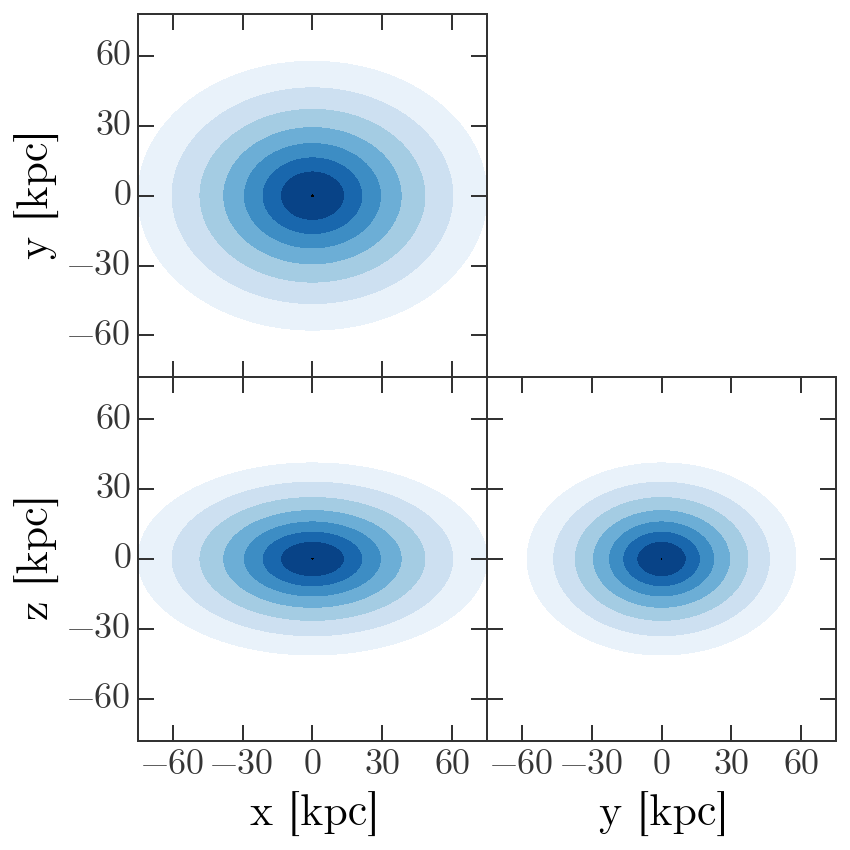

In [4]:
potential2 = gp.LogarithmicPotential(v_c=0.2, r_h=20., q1=1., q2=0.77, q3=0.55, units=galactic)

lim = 75
grid = np.linspace(-120,120,1000)
cmap = 'Blues_r'
vals = potential2.value(np.array([[1.,0,0],[lim,0,0]]))

levels = np.linspace(vals.min(), vals.max(), 8)
# levels = np.logspace(vals.min(), vals.max(), 10)

# ------------------------------------------------

fig,axes = plt.subplots(2,2, figsize=(6,6), sharex=True, sharey=True)
fig.set_facecolor('w')
fig = potential2.plot_contours(grid=(grid,grid,0), ax=axes[0,0], cmap=cmap, levels=levels)
fig = potential2.plot_contours(grid=(grid,0,grid), ax=axes[1,0], cmap=cmap, levels=levels)
fig = potential2.plot_contours(grid=(0,grid,grid), ax=axes[1,1], cmap=cmap, levels=levels)

axes[0,0].set_xlim(-75,75)
axes[0,0].set_ylim(*axes[0,0].get_xlim())

axes[0,0].set_ylabel(r"y [kpc]")
axes[1,0].set_xlabel(r"x [kpc]")
axes[1,0].set_ylabel(r"z [kpc]")
axes[1,1].set_xlabel(r"y [kpc]")

# Hack to hide hole
axes[0,0].plot(0,0,marker='o',zorder=-1000,c='k')
axes[1,0].plot(0,0,marker='o',zorder=-1000,c='k')
axes[1,1].plot(0,0,marker='o',zorder=-1000,c='k')

tk = [-60,-30,0,30,60]
for ax in axes.flat:
    ax.set_aspect('equal')
    ax.xaxis.set_ticks(tk)
    ax.yaxis.set_ticks(tk)

fig.tight_layout()
fig.subplots_adjust(wspace=0., hspace=0.)
axes[0,1].set_visible(False)